# Закрепление знаний

Набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [11]:
# смотрим количество строк
diabetes.shape[0]

778

In [3]:
# отображаем список всех столбцов
list(diabetes.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Gender']

In [10]:
# создаем маску дубликатов
mask = diabetes.duplicated()
# смотрим сколько дубликатов
diabetes_dupl = diabetes[mask]
diabetes_dupl.shape[0]

10

In [12]:
# удаляем дубликаты
diabetes_dedupped = diabetes.drop_duplicates()
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Результирующее число записей: 768


In [13]:
# переименовываем рабочий датафрейм
diabetes = diabetes_dedupped

In [25]:
# создаем пустой список, куда будем добавлять 
# названия признаков, которые посчитаем неинформативными
low_information_cols = []

# в цикле проходимся по всем именам столбцов
for col in diabetes.columns:
    # расчитаем наибольшую относительную частоту
    top_freq = diabetes[col].value_counts(normalize=True).max()
    # рассчитаем отношение числа уникальных значений в столбце к
    # размеру всего столбца
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравним каждое из полученных чисел с пороговым значением
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [28]:
# очищаем датафрэйм от неинформативных признаков
diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')

Результирующее число признаков: 9


In [80]:
# создаем копию дф
diabetes_with_nan = diabetes.copy()
# список столбцов, в которых нужно заменить 0 на nan
cols_to_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# пройдемся циклом по каждому столбцу в дф
for col in diabetes_with_nan.columns:
    # если столблец находится в списке под измененение
    if col in cols_to_nan:
        # заменяем в каждом столбце 0 на nan
        diabetes_with_nan[col] = diabetes_with_nan[col].replace(0, np.nan)

diabetes_with_nan

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [88]:
# ищем процентное соотношение пропущенных значений в дф
cols_nan_percent = diabetes_with_nan.isnull().mean()
# оставляем только те колонки, где есть нули и сортируем
cols_with_nan = cols_nan_percent[cols_nan_percent>0].sort_values(ascending=False)
cols_with_nan

Insulin          0.486979
SkinThickness    0.295573
BloodPressure    0.045573
BMI              0.014323
Glucose          0.006510
dtype: float64

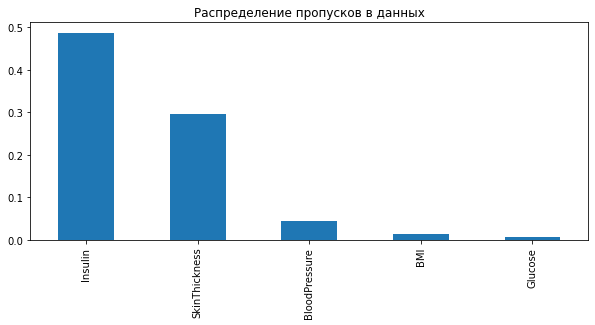

In [89]:
# построим столбчатую диаграмму распределения пропусков в данных
cols_with_nan.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

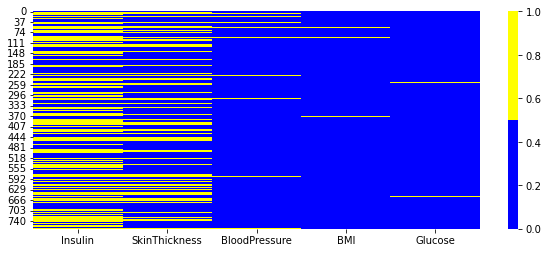

In [90]:
# построим тепловую карту пропусков в данных
colors = ['blue', 'yellow']
fig = plt.figure(figsize=(10, 4))
cols = cols_with_nan.index
ax = sns.heatmap(
    diabetes_with_nan[cols].isnull(),
    cmap=sns.color_palette(colors)
)

In [91]:
# удаляем признаки, где число пропусков более 30%
# создаем пустой список признаков
list_with_nan = []
# проходим по каждому столбцу nan_data
for col in diabetes_with_nan.columns:
    # определяем долю пропуска в признаке
    nan_percent = diabetes_with_nan[col].isnull().mean() * 100
    # если пропусков более 30% добавляем признак в список
    if nan_percent > 30:
        list_with_nan.append(col)
        print(f'{col}: {round(nan_percent, 2)}% пропусков')

Insulin: 48.7% пропусков


In [92]:
# удаляем из дф признаки, которые попали в cols_with_nan
diabetes_cleaned = diabetes_with_nan.drop(list_with_nan, axis=1)
# показываем количество признаков, оставшихся в дф
diabetes_cleaned.shape[1]

8

In [93]:
# удаляем строки, в которых больше 2 пропусков

# задаем порог удаления, должно быть более 2 пропусков
# то есть заполненных значений должно быть количество столбцов минус 2
thresh = diabetes_cleaned.shape[1] - 2
diabetes_cleaned = diabetes_cleaned.dropna(how='any', thresh=thresh, axis=0)
# смотрим результирующее число записей в таблице
diabetes_cleaned.shape

(761, 8)

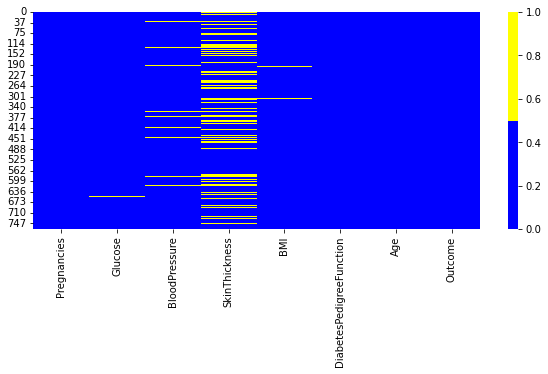

In [95]:
# визуализируем оставшиеся пропуски

colors = ['blue', 'yellow']
fig = plt.figure(figsize=(10, 4))
ax = sns.heatmap(
    diabetes_cleaned.isnull(),
    cmap=sns.color_palette(colors)
)

In [104]:
# в оставшихся записях заменяем пропуски на медиану

# смотрим в каких столбцах остались пропуски
cols_nan_percent = diabetes_cleaned.isnull().mean()
# оставляем только те, где есть пропуски
cols_with_nan = cols_nan_percent[cols_nan_percent>0].sort_values(ascending=False)
# получаем список столбцов, в которых есть пропуски
cols_with_nan = list(cols_with_nan.index)
cols_with_nan

['SkinThickness', 'BloodPressure', 'Glucose', 'BMI']

In [106]:
# создаем словарь имя столбца: значение, на которое нужно
# заменить пропуски
values = {
    'SkinThickness': diabetes_cleaned['SkinThickness'].median(),
    'BloodPressure': diabetes_cleaned['BloodPressure'].median(),
    'Glucose': diabetes_cleaned['Glucose'].median(),
    'BMI': diabetes_cleaned['BMI'].median(),
}

diabetes = diabetes_cleaned.fillna(values)
# проверяем размер 
diabetes.shape

(761, 8)

In [107]:
# определяем среднее значение столбца SkinThickness
# округляем до десятых
round(diabetes['SkinThickness'].mean(), 1)

29.1

In [108]:
# выбросы

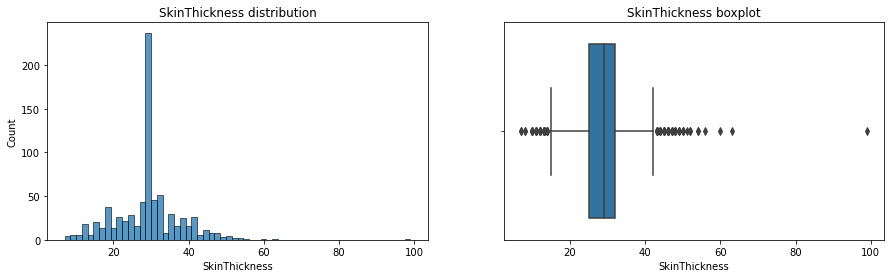

In [112]:
# строим гистограмму и коробчатую диаграмму для SkinThickness
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# гистограмма
histplot = sns.histplot(
    data=diabetes,
    x='SkinThickness',
    ax=axes[0]
)
histplot.set_title('SkinThickness distribution')
# boxplot
boxplot = sns.boxplot(
    data=diabetes,
    x='SkinThickness',
    ax=axes[1]
)
boxplot.set_title('SkinThickness boxplot');

In [126]:
# определяем количество выбросов по методу межквартильного размаха

# создаем функцию

def outliers_func(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (1.5 * iqr)
    upper_bound = quartile_3 + (1.5 * iqr)
    outliers = data[(x<lower_bound) | (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned

# применяем функцию к дф
outliers, claened = outliers_func(diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 87


In [117]:
# определяем количество выбросов по методу z-отклонений

# создаем функцию определения количества выбросов по методу z
def outliers_z_score(data, feature, log_scale=False):
    # если нужна лог шкала
    if log_scale:
        x = np.log(data[feature] + 1)
    # если не нужна лог шкала
    else:
        x = data[feature]
    # вычисляем математическое ожидание (среднее)
    mu = x.mean()
    # вычисляем стандартное отклонение признака
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x<lower_bound) | (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned

# применяем функцию к признаку
outliers, clened = outliers_z_score(diabetes, 'SkinThickness')
print(f'Число выбросов по методу z: {outliers.shape[0]}')

Число выбросов по методу z: 4


In [121]:
# рассматриваем признак DiabetesPedigreeFunction 
outliers, cleaned = outliers_func(diabetes, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу тьюки: {outliers.shape[0]}')

Число выбросов по методу тьюки: 29


In [127]:
# в логарифмическом масштабе
outliers, cleaned = outliers_func(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу тьюки в лог масштабе: {outliers.shape[0]}')

Число выбросов по методу тьюки в лог масштабе: 0
